# Final Project : Traffic Flow Prediction

Aim : To build LSTM model for traffic flow prediction.


In [ ]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,  Dropout, Dense


In [ ]:
# load dataset

dataset = pd.read_csv('traffic.csv')

data = dataset.copy() #using it for data exploration

dataset.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
dataset.shape

(48120, 4)

In [ ]:
dataset.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [ ]:
# convert DateTime in string to DateTime format
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])

# index DateTime
dataset.set_index('DateTime', inplace=True)

dataset.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [ ]:
dataset.isnull().sum()

Junction    0
Vehicles    0
ID          0
dtype: int64

Data exploration for junction 1

In [ ]:
# select junction 1 to work with

junction1 = dataset[dataset['Junction'] == 1]

junction1.head()


,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


In [ ]:
junction1.shape

(14592, 3)

<Axes: xlabel='DateTime'>

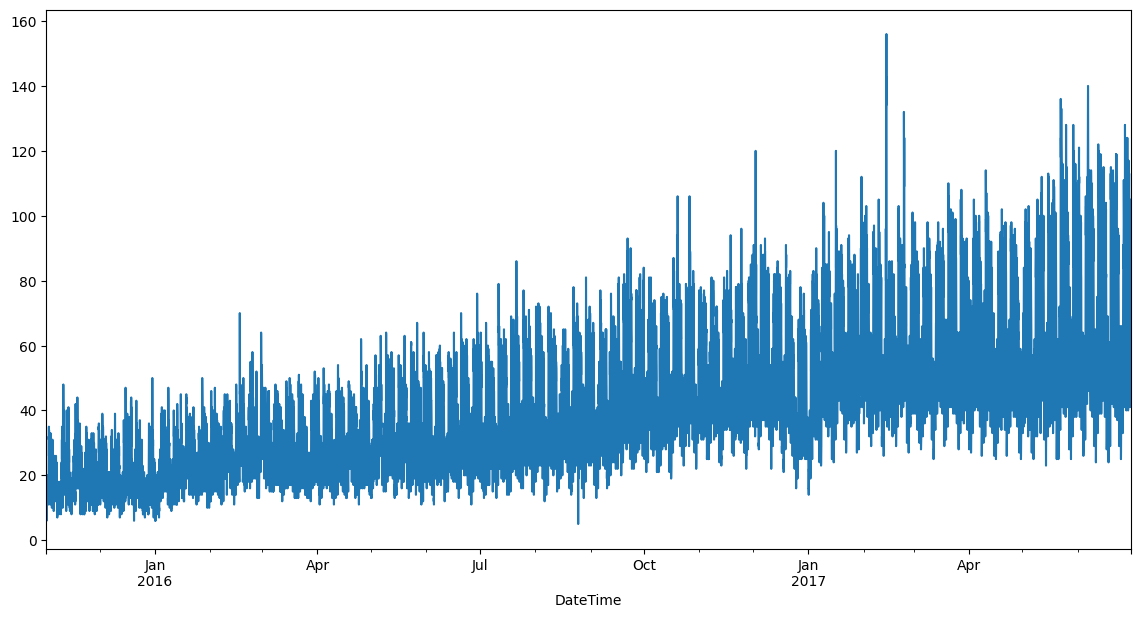

In [ ]:
# plot junction 1 data
plt.figure(figsize=(14,7))
junction1['Vehicles'].plot()

In [ ]:
# resample data as daily average

daily_junction1 = junction1.Vehicles.resample('D').mean()

In [ ]:
daily_junction1

DateTime
2015-11-01    13.625000
2015-11-02    22.750000
2015-11-03    22.666667
2015-11-04    20.750000
2015-11-05    19.333333
                ...    
2017-06-26    73.916667
2017-06-27    91.125000
2017-06-28    86.666667
2017-06-29    86.916667
2017-06-30    78.458333
Freq: D, Name: Vehicles, Length: 608, dtype: float64

In [ ]:
daily_junction1.shape

(608,)

<Axes: xlabel='DateTime'>

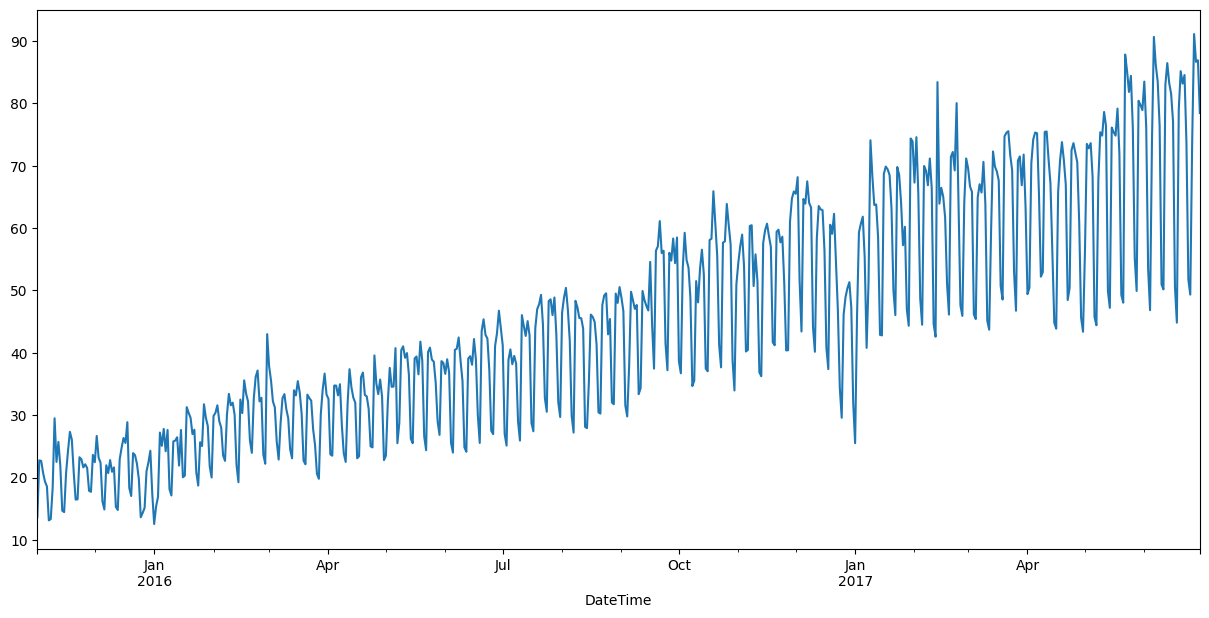

In [ ]:
# plot resampled junc 1 data

plt.figure(figsize=(15,7))
daily_junction1.plot()

Data exploration for entire dataset, to gain insights

In [ ]:
data.drop(['ID'],axis=1, inplace=True)

data

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


Text(0.5, 0, 'Date')

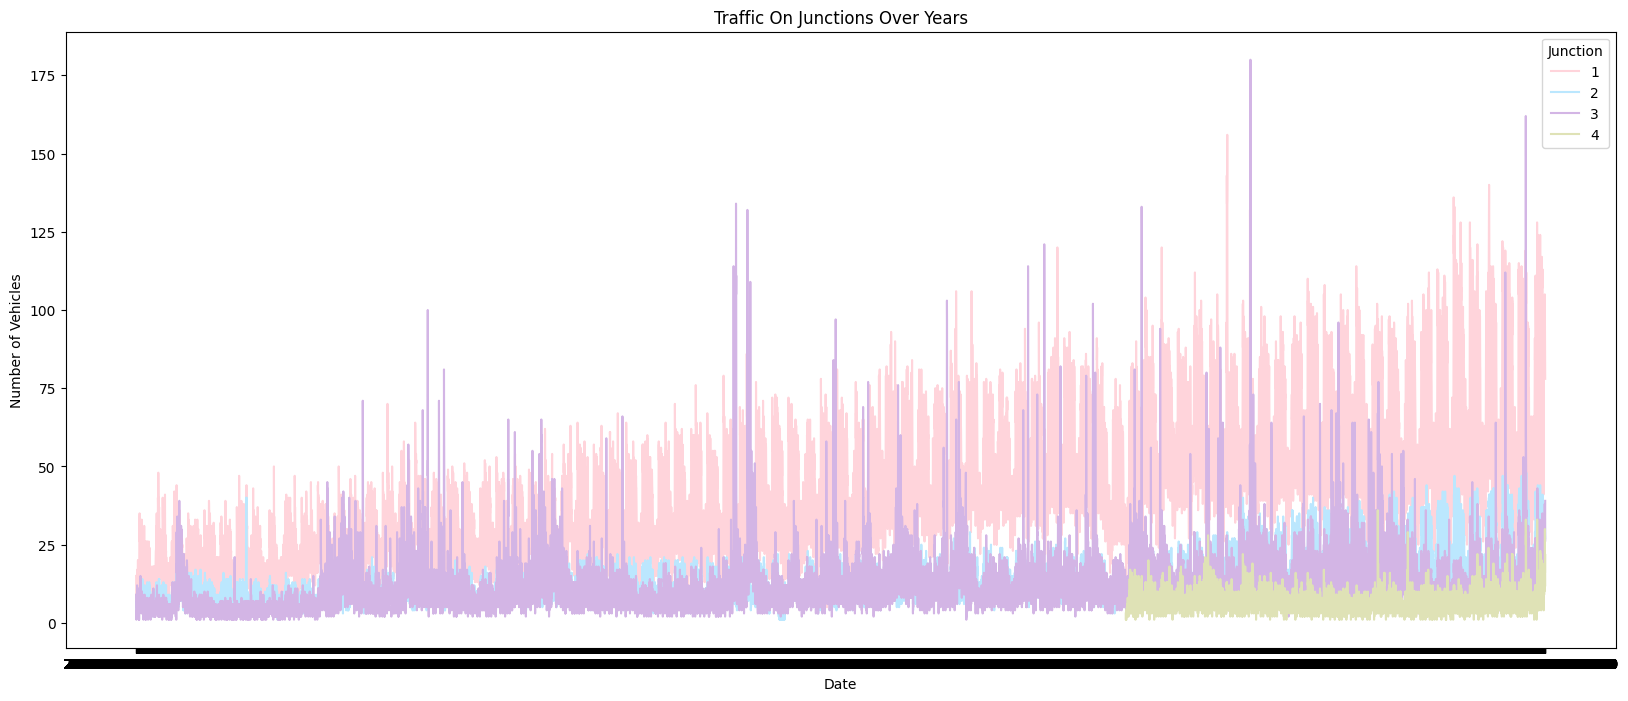

In [ ]:
# plot timeseries
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]

plt.figure(figsize=(20,8))
Time_series = sns.lineplot(x=data['DateTime'],y="Vehicles",data=data, hue="Junction", palette=colors)
Time_series.set_title("Traffic On Junctions Over Years")
Time_series.set_ylabel("Number of Vehicles")
Time_series.set_xlabel("Date")

1st junction is having upward trend

4th junc has data only after 2017

to check for seasonality, explore datetime decomposition

In [ ]:
# feature engineering

# exploring more features
# year, month, date, days, hour

data['DateTime'] = pd.to_datetime(data['DateTime'])

data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Date_no'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data.DateTime.dt.strftime("%A")
data.head(25)

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday
5,2015-11-01 05:00:00,1,6,2015,11,1,5,Sunday
6,2015-11-01 06:00:00,1,9,2015,11,1,6,Sunday
7,2015-11-01 07:00:00,1,8,2015,11,1,7,Sunday
8,2015-11-01 08:00:00,1,11,2015,11,1,8,Sunday
9,2015-11-01 09:00:00,1,12,2015,11,1,9,Sunday


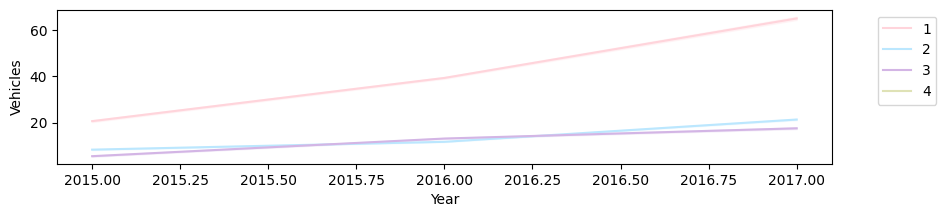

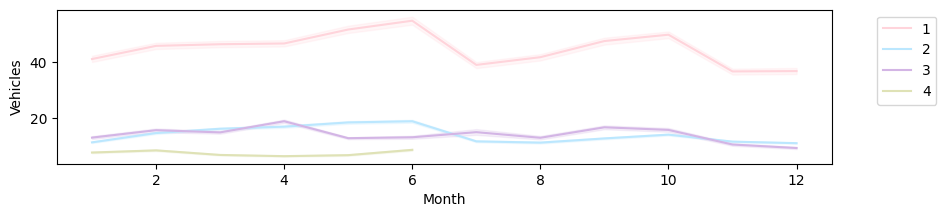

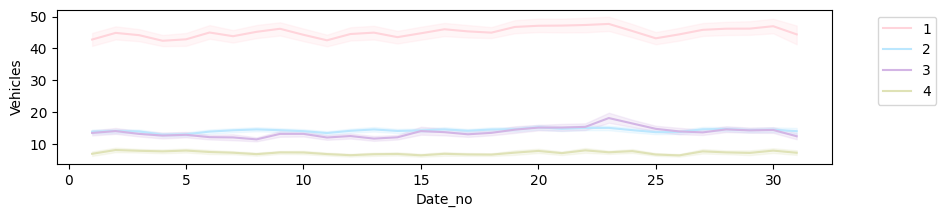

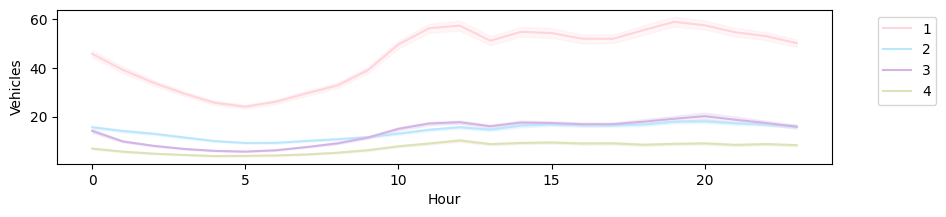

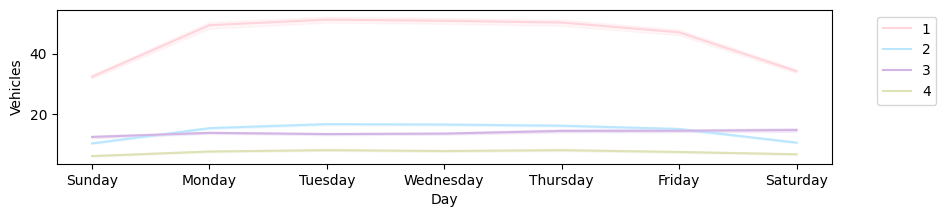

In [ ]:
# plot new features

new_features = ['Year', 'Month','Date_no','Hour','Day']

for i in new_features:
    plt.figure(figsize=(10,2))
    ax = sns.lineplot(x = data[i], y ='Vehicles', data = data, hue='Junction', palette = colors)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)


yearly upward trend  except at junc 4

consistent monthly traffic

daily, peak during morning and evening

weekly, smooth traffic on saturday - sunday and steady mon - fri at junc 1

smooth throughout at junc 3 and 4

Text(0.5, 0, 'Date')

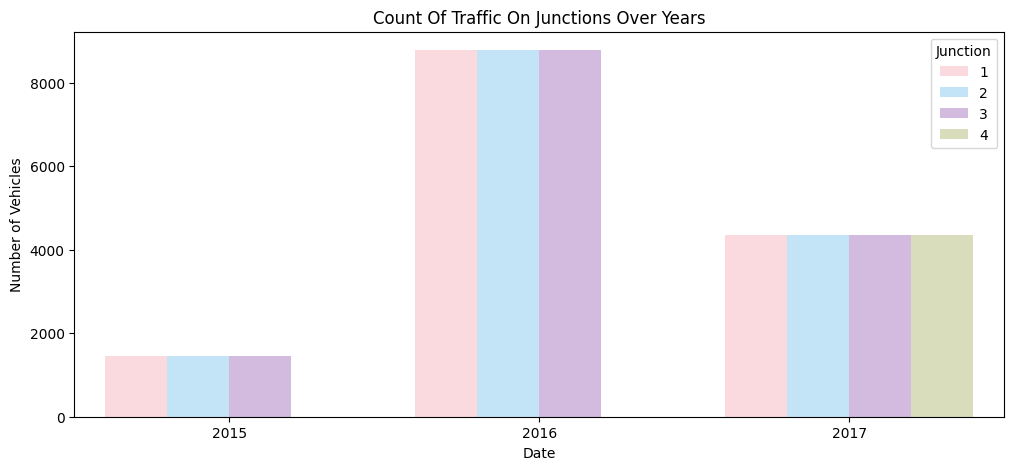

In [ ]:
# traffic count on junctions

plt.figure(figsize=(12,5))
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

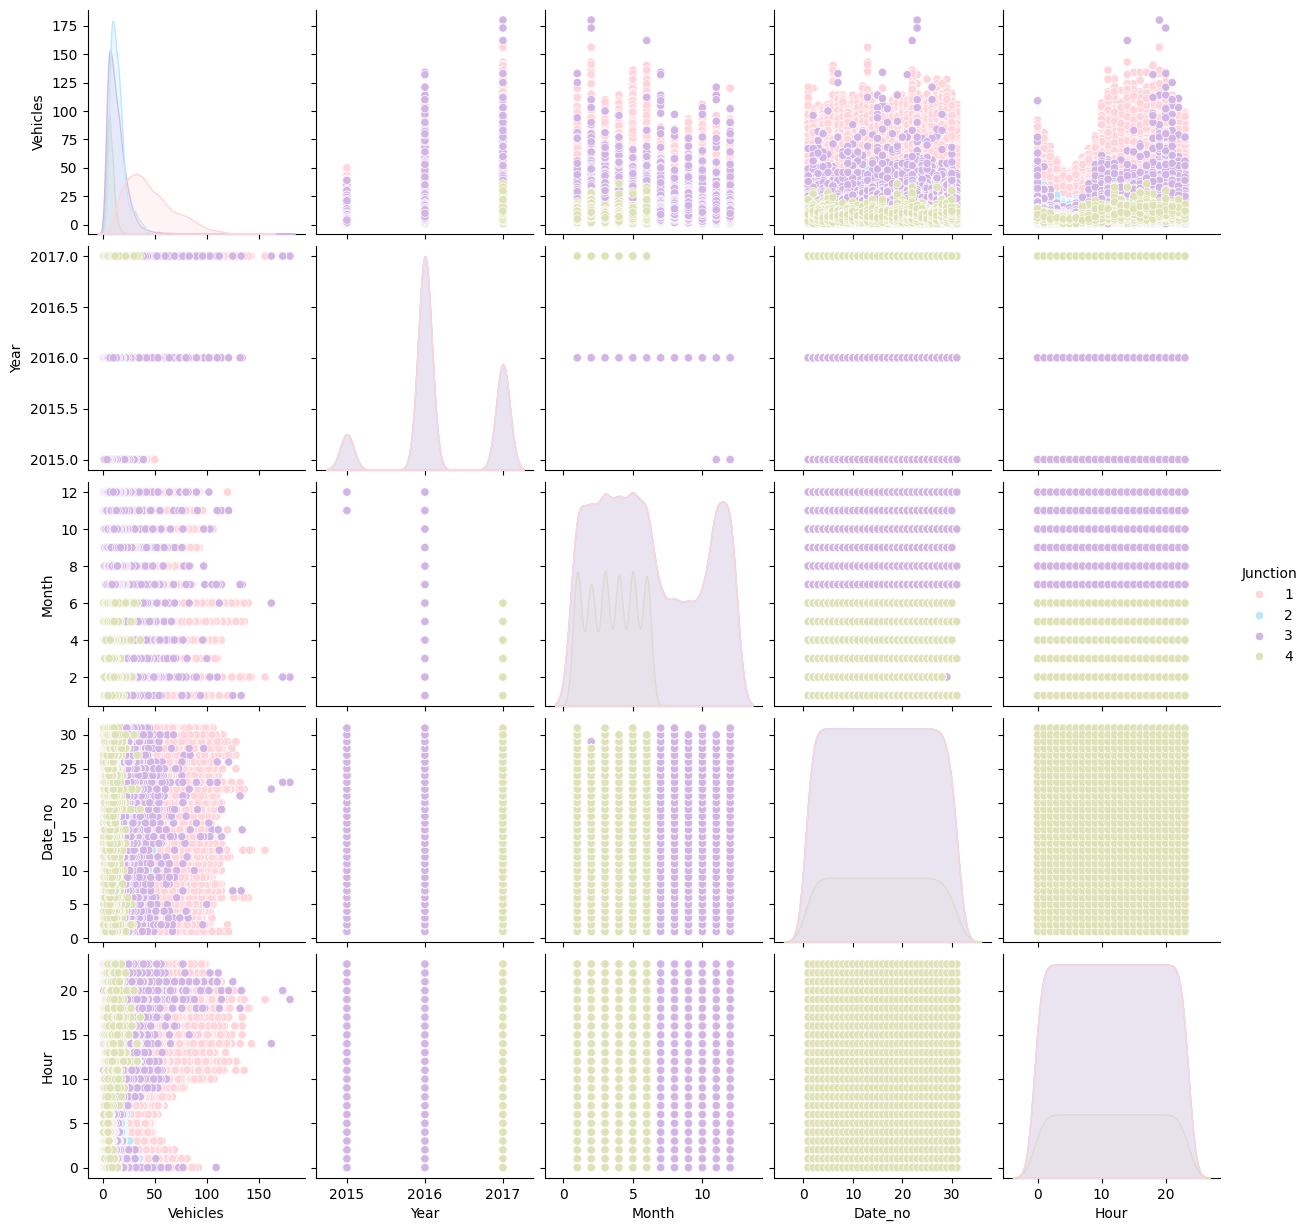

In [ ]:
# pairplot of data

sns.pairplot(data=data, hue='Junction', palette = colors)

In [ ]:
data.set_index('DateTime', inplace=True)
data

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,-0.375485,2015,11,1,0,Sunday
2015-11-01 01:00:00,1,-0.471870,2015,11,1,1,Sunday
2015-11-01 02:00:00,1,-0.616448,2015,11,1,2,Sunday
2015-11-01 03:00:00,1,-0.761026,2015,11,1,3,Sunday
2015-11-01 04:00:00,1,-0.664641,2015,11,1,4,Sunday
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,-0.568255,2017,6,30,19,Friday
2017-06-30 20:00:00,4,0.347405,2017,6,30,20,Friday
2017-06-30 21:00:00,4,-0.327292,2017,6,30,21,Friday


In [ ]:
# standardization of Vehicles

mean = data['Vehicles'].mean()
std = data['Vehicles'].std()
data['Vehicles'] = (data['Vehicles'] - mean ) / std

In [ ]:
data.drop(columns=['Day'],inplace=True)

data.head()

,Junction,Vehicles,Year,Month,Date_no,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,-0.375485,2015,11,1,0
2015-11-01 01:00:00,1,-0.471870,2015,11,1,1
2015-11-01 02:00:00,1,-0.616448,2015,11,1,2
2015-11-01 03:00:00,1,-0.761026,2015,11,1,3
2015-11-01 04:00:00,1,-0.664641,2015,11,1,4


In [ ]:
# create sequences

def create_sequences(data, time_steps=1):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data.iloc[i:(i + time_steps)].values)
        labels.append(data.iloc[i + time_steps]['Vehicles'])
    return np.array(sequences), np.array(labels)


In [ ]:
time_steps = 24  # use past 24 hours to predict the next hour
X, y = create_sequences(data, time_steps)

In [ ]:
# split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# build the LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

C:\Users\mohdz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0801 - val_loss: 0.0941
Epoch 2/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - loss: 0.0759 - val_loss: 0.0897
Epoch 3/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - loss: 0.0740 - val_loss: 0.0858
Epoch 4/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - loss: 0.0753 - val_loss: 0.0898
Epoch 5/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - loss: 0.0738 - val_loss: 0.0959
Epoch 6/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 0.0710 - val_loss: 0.1339
Epoch 7/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - loss: 0.0678 - val_loss: 0.1044
Epoch 8/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - loss: 0.0709 - val_loss: 0.1474
Epoch 9/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - loss: 0.0683 - val_loss: 0.0835
Epoch 10/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - loss: 0.0664 - val_loss: 0.0844
Epoch 11/30
1083/1083 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - loss: 0.0713 - val_loss: 0.1014
Epoch 12

In [ ]:
# evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss*100}%')

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1050
Test Loss: 6.976970285177231%


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

 49/301 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [ ]:
# Inverse transform predictions and actual values

y_test_inv = (y_test * std) + mean
y_pred_inv = (y_pred * std) + mean

In [ ]:
# evaluation metrics

mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Test - Mean Squared Error: {mse}')

Test - Mean Squared Error: 30.04039943647448


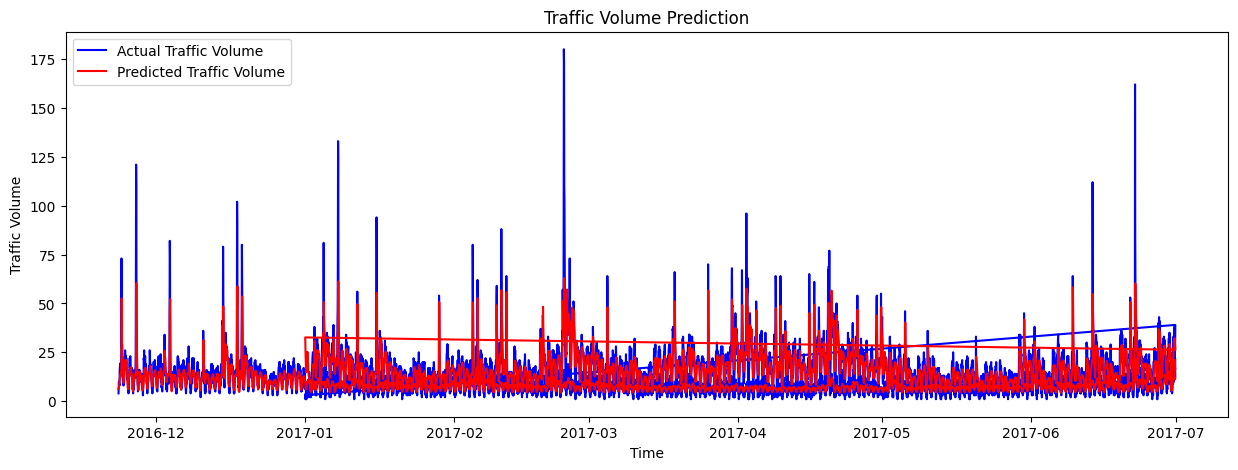

In [ ]:
# Plot the results

plt.figure(figsize=(15, 5))
plt.plot(data.index[-len(y_test):], y_test_inv, color='blue', label='Actual Traffic Volume')
plt.plot(data.index[-len(y_test):], y_pred_inv, color='red', label='Predicted Traffic Volume')
plt.title('Traffic Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()